In [1]:
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from datasets.vowel import X_train, y_train, X_test, y_test

In [2]:
def error_rate(clf, X_train, y_train, X_test, y_test, dim):
    clf.fit(X_train, y_train)
    X_train = clf.transform(X_train)[:, :dim]
    X_test  = clf.transform(X_test )[:, :dim]
    clf.fit(X_train, y_train)
    return {
        'Train Data': 1 - clf.score(X_train, y_train),
        'Test Data':  1 - clf.score(X_test,  y_test ),
    }

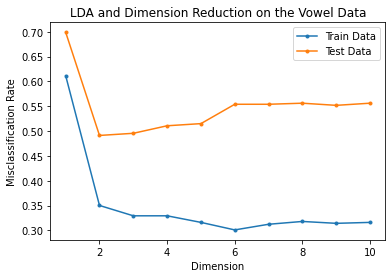

In [3]:
dims = list(range(1, 11))
ax = pd.DataFrame(data=[
    error_rate(LinearDiscriminantAnalysis(),
        X_train, y_train, X_test, y_test, dim)
    for dim in dims
], index=dims).plot(style='.-')
ax.set_xlabel("Dimension")
ax.set_ylabel("Misclassification Rate")
ax.set_title("LDA and Dimension Reduction on the Vowel Data");